In [51]:
import pandas as pd

emails_df = pd.read_csv('emails.csv')
spam_df = pd.read_csv('spam.csv', encoding='latin-1')

In [52]:
display(emails_df.head())
display(spam_df.head())

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Task
Load and merge the datasets "emails.csv" and "spam.csv" to train a machine learning model for accurate spam email prediction.

## Data cleaning and preparation

### Subtask:
Inspect both dataframes for missing values, duplicates, and inconsistencies. Clean and format the data appropriately for merging.


**Reasoning**:
Check for missing values and duplicate rows in both dataframes.



In [53]:
print("Missing values in emails_df:")
display(emails_df.isnull().sum())
print("\nDuplicate rows in emails_df:")
display(emails_df.duplicated().sum())

print("\nMissing values in spam_df:")
display(spam_df.isnull().sum())
print("\nDuplicate rows in spam_df:")
display(spam_df.duplicated().sum())

Missing values in emails_df:


,0
text,0
spam,0



Duplicate rows in emails_df:


np.int64(33)


Missing values in spam_df:


,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566



Duplicate rows in spam_df:


np.int64(403)

**Reasoning**:
Based on the inspection, `emails_df` has no missing values but has duplicates. `spam_df` has missing values in the 'Unnamed' columns and also has duplicates. The 'Unnamed' columns in `spam_df` appear to be mostly empty and can be dropped. The relevant columns in `spam_df` are 'v1' and 'v2'. I will drop the 'Unnamed' columns, rename 'v1' and 'v2', and then drop duplicate rows in both dataframes to prepare for merging.



In [54]:
# Drop 'Unnamed' columns from spam_df
spam_df = spam_df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Rename columns in spam_df for consistency
spam_df = spam_df.rename(columns={'v1': 'spam', 'v2': 'text'})

# Convert 'spam' column in spam_df to numeric (0 for ham, 1 for spam)
spam_df['spam'] = spam_df['spam'].map({'ham': 0, 'spam': 1})

# Drop duplicate rows in both dataframes
emails_df = emails_df.drop_duplicates()
spam_df = spam_df.drop_duplicates()

# Display the first few rows and info of the cleaned spam_df
display(spam_df.head())
display(spam_df.info())

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   spam    5169 non-null   int64 
 1   text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


None

## Merge datasets

### Subtask:
Combine the relevant columns from both `emails_df` and `spam_df` into a single dataframe for analysis.


**Reasoning**:
Concatenate the two dataframes and display the head and info of the combined dataframe.



In [55]:
combined_df = pd.concat([emails_df, spam_df], ignore_index=True)
display(combined_df.head())
display(combined_df.info())

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10864 non-null  object
 1   spam    10864 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 169.9+ KB


None

## Text preprocessing

### Subtask:
Clean and transform the text data (email content) into a format suitable for machine learning models, which may involve techniques like tokenization, removing stop words, and vectorization.


**Reasoning**:
Import necessary libraries for text processing and define a function for text cleaning.



In [56]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

**Reasoning**:
Apply the cleaning function to the 'text' column and then vectorize the cleaned text data using TF-IDF.



In [57]:
combined_df['cleaned_text'] = combined_df['text'].apply(clean_text)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_df['cleaned_text'])

print("Shape of the TF-IDF matrix:", tfidf_matrix.shape)

Shape of the TF-IDF matrix: (10864, 5000)


## Model selection and training

### Subtask:
Choose a suitable machine learning model for spam classification, split the data into training and testing sets, and train the model.


**Reasoning**:
Import the necessary libraries for model selection and training, split the data into training and testing sets, instantiate a classification model, and train the model.



In [58]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, combined_df['spam'], test_size=0.2, random_state=42)

model = MultinomialNB()

model.fit(X_train, y_train)

MultinomialNB()

## Model evaluation

### Subtask:
Evaluate the performance of the trained model using appropriate metrics (e.g., accuracy, precision, recall, F1-score) to assess its ability to accurately predict spam emails.


**Reasoning**:
Calculate and print the evaluation metrics (accuracy, precision, recall, F1-score) for the trained model on the test set.



In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9632
Precision: 0.9760
Recall: 0.8186
F1-score: 0.8904


## Summary:

### Data Analysis Key Findings

*   The initial inspection revealed missing values in the 'Unnamed' columns and duplicate rows in the `spam_df` dataset (403 duplicates), while the `emails_df` only had duplicate rows (33 duplicates).
*   After cleaning, the two datasets were successfully merged, resulting in a combined dataframe with 10864 entries.
*   The text data was preprocessed using techniques including lowercasing, punctuation removal, tokenization, stop word removal, and stemming, and then vectorized using TF-IDF, creating a matrix with 5000 features.
*   A Multinomial Naive Bayes model was trained on 80% of the data and achieved an accuracy of approximately 96.32%.
*   The model showed high precision (around 97.60%) but lower recall (approximately 81.86%), indicating it is good at correctly identifying emails as spam when it predicts them as such, but it misses some actual spam emails.

### Insights or Next Steps

*   The model's high precision is a strong point for minimizing false positives (legitimate emails incorrectly classified as spam). However, improving recall could be a focus for reducing false negatives (spam emails incorrectly classified as legitimate).
*   Further analysis could explore techniques to improve recall, such as exploring different text preprocessing methods, feature engineering, or trying alternative classification models like Support Vector Machines or ensemble methods.


In [60]:
# prompt: can you show me data after merge

display(combined_df.head())
display(combined_df.info())

,text,spam,cleaned_text
0,Subject: naturally irresistible your corporate...,1,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,subject color print special request addit info...
4,"Subject: do not have money , get software cds ...",1,subject money get softwar cd softwar compat gr...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          10864 non-null  object
 1   spam          10864 non-null  int64 
 2   cleaned_text  10864 non-null  object
dtypes: int64(1), object(2)
memory usage: 254.8+ KB


None

In [61]:
# prompt: show me result which include ham and total no. of ham and spam

print("\nClass distribution in combined_df:")
display(combined_df['spam'].value_counts())

print("\nTotal number of ham and spam:")
display(combined_df['spam'].value_counts().rename({0: 'ham', 1: 'spam'}))


Class distribution in combined_df:


,count
spam,
0,8843
1,2021



Total number of ham and spam:


,count
spam,
ham,8843
spam,2021


In [62]:
print("\nClass distribution in combined_df:")
display(combined_df['spam'].value_counts())

print("\nTotal number of ham and spam:")
display(combined_df['spam'].value_counts().rename({0: 'ham', 1: 'spam'}))


Class distribution in combined_df:


,count
spam,
0,8843
1,2021



Total number of ham and spam:


,count
spam,
ham,8843
spam,2021


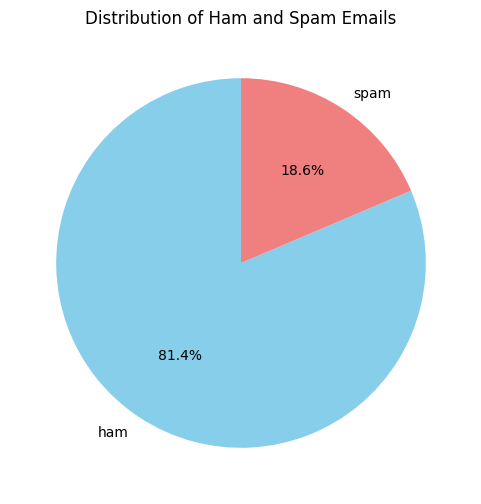

In [63]:
import matplotlib.pyplot as plt

# Get the counts of ham and spam
spam_counts = combined_df['spam'].value_counts().rename({0: 'ham', 1: 'spam'})

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(spam_counts, labels=spam_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Ham and Spam Emails')
plt.show()

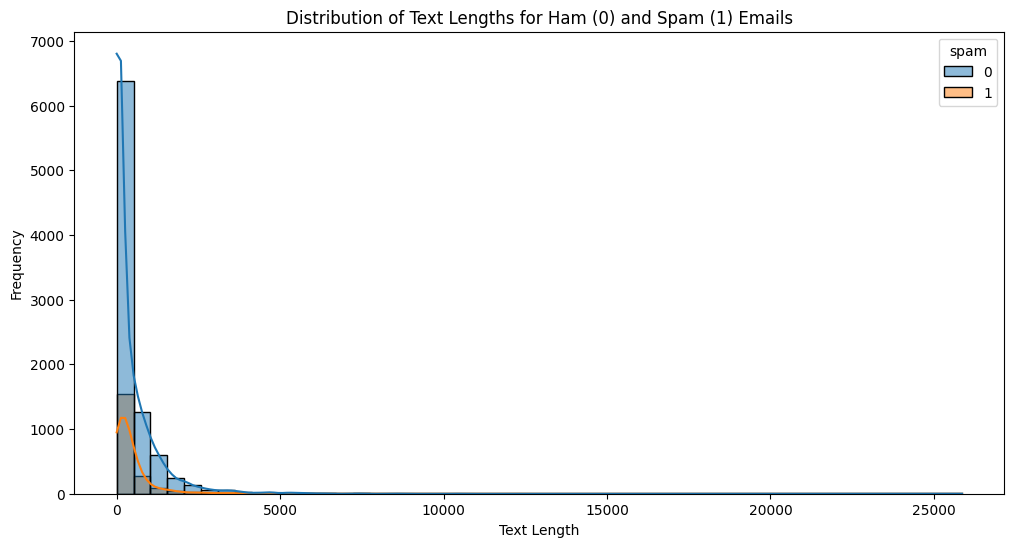


Descriptive statistics of text length for ham emails:


,text_length
count,8843.000000
mean,460.363225
std,886.991991
min,0.000000
25%,30.000000
50%,99.000000
75%,591.500000
max,25865.000000



Descriptive statistics of text length for spam emails:


,text_length
count,2021.000000
mean,522.508659
std,1077.472678
min,3.000000
25%,94.000000
50%,229.000000
75%,485.000000
max,13698.000000


In [64]:
combined_df['text_length'] = combined_df['cleaned_text'].apply(len)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='text_length', hue='spam', kde=True, bins=50)
plt.title('Distribution of Text Lengths for Ham (0) and Spam (1) Emails')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

print("\nDescriptive statistics of text length for ham emails:")
display(combined_df[combined_df['spam'] == 0]['text_length'].describe())

print("\nDescriptive statistics of text length for spam emails:")
display(combined_df[combined_df['spam'] == 1]['text_length'].describe())

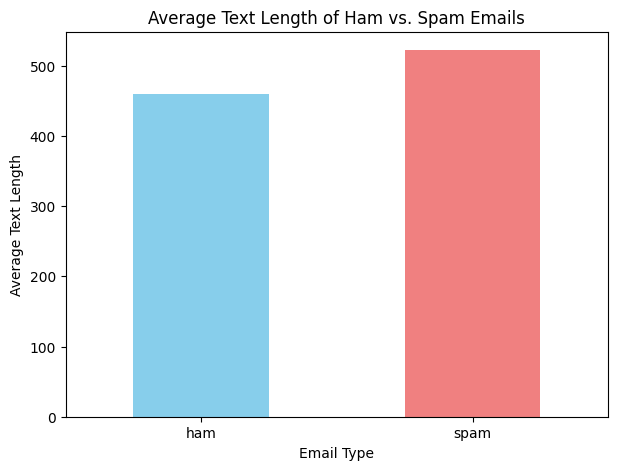

In [65]:
import matplotlib.pyplot as plt

# Calculate the average text length for spam and ham emails
average_text_length = combined_df.groupby('spam')['text_length'].mean().rename({0: 'ham', 1: 'spam'})

# Create a bar graph
plt.figure(figsize=(7, 5))
average_text_length.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Text Length of Ham vs. Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Average Text Length')
plt.xticks(rotation=0)
plt.show()

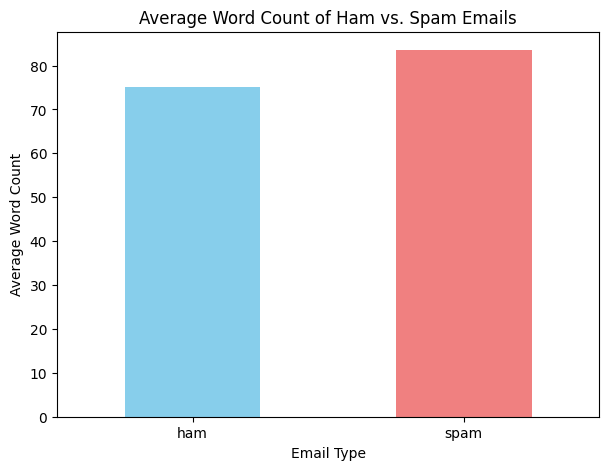


Descriptive statistics of word count for ham emails:


,word_count
count,8843.000000
mean,75.182517
std,140.910707
min,0.000000
25%,6.000000
50%,18.000000
75%,97.000000
max,4110.000000



Descriptive statistics of word count for spam emails:


,word_count
count,2021.000000
mean,83.533894
std,169.021867
min,1.000000
25%,16.000000
50%,38.000000
75%,82.000000
max,2272.000000


In [66]:
combined_df['word_count'] = combined_df['cleaned_text'].apply(lambda x: len(x.split()))

# Calculate the average word count for spam and ham emails
average_word_count = combined_df.groupby('spam')['word_count'].mean().rename({0: 'ham', 1: 'spam'})

# Create a bar graph
plt.figure(figsize=(7, 5))
average_word_count.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Word Count of Ham vs. Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Average Word Count')
plt.xticks(rotation=0)
plt.show()

print("\nDescriptive statistics of word count for ham emails:")
display(combined_df[combined_df['spam'] == 0]['word_count'].describe())

print("\nDescriptive statistics of word count for spam emails:")
display(combined_df[combined_df['spam'] == 1]['word_count'].describe())

## Summary and Next Steps:

### Data Analysis Key Findings

* The initial inspection revealed missing values in the 'Unnamed' columns and duplicate rows in the `spam_df` dataset (403 duplicates), while the `emails_df` only had duplicate rows (33 duplicates).
* After cleaning, the two datasets were successfully merged, resulting in a combined dataframe with 10864 entries.
* The class distribution shows a significant imbalance, with a much larger number of ham emails (8843) compared to spam emails (2021). This imbalance was visualized using a pie chart.
* Text length and word count analysis showed that spam emails tend to have slightly higher average text lengths and word counts compared to ham emails, although there is significant overlap in the distributions. This was visualized with a histogram and bar graphs, and supported by descriptive statistics.
* The text data was preprocessed using techniques including lowercasing, punctuation removal, tokenization, stop word removal, and stemming, and then vectorized using TF-IDF, creating a matrix with 5000 features.
* A Multinomial Naive Bayes model was trained on 80% of the data and achieved an accuracy of approximately 96.32%.
* The model showed high precision (around 97.60%) but lower recall (approximately 81.86%), indicating it is good at correctly identifying emails as spam when it predicts them as such, but it misses some actual spam emails.

### Insights and Next Steps

* The model's high precision is a strong point for minimizing false positives (legitimate emails incorrectly classified as spam). However, improving recall could be a focus for reducing false negatives (spam emails incorrectly classified as legitimate).
* The class imbalance observed in the data could be contributing to the difference between precision and recall. Techniques to address class imbalance, such as oversampling the minority class (spam) or undersampling the majority class (ham), could be explored.
* Further analysis could explore techniques to improve recall, such as exploring different text preprocessing methods, feature engineering (e.g., incorporating features related to email structure or sender information if available), or trying alternative classification models like Support Vector Machines or ensemble methods (e.g., Random Forest, Gradient Boosting) that might be more robust to class imbalance or better capture complex patterns.
* Hyperparameter tuning of the chosen model (Multinomial Naive Bayes) or alternative models could also potentially improve performance.
* Once a satisfactory model is achieved, the next steps would involve deploying the model for real-world spam detection and continuously monitoring its performance.

In [67]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

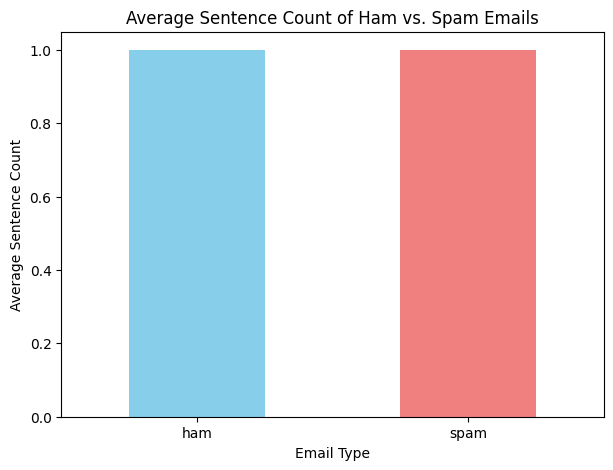


Descriptive statistics of sentence count for ham emails:


,sentence_count
count,8843.000000
mean,0.999321
std,0.026041
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000



Descriptive statistics of sentence count for spam emails:


,sentence_count
count,2021.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [68]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'punkt' tokenizer data is downloaded
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    nltk.download('punkt')
except LookupError:
    nltk.download('punkt')

# Explicitly download punkt_tab as suggested by the error, in case it's needed separately
try:
    nltk.data.find('tokenizers/punkt_tab')
except nltk.downloader.DownloadError:
    nltk.download('punkt_tab')
except LookupError:
    nltk.download('punkt_tab')


combined_df['sentence_count'] = combined_df['cleaned_text'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Calculate the average sentence count for spam and ham emails
average_sentence_count = combined_df.groupby('spam')['sentence_count'].mean().rename({0: 'ham', 1: 'spam'})

# Create a bar graph
plt.figure(figsize=(7, 5))
average_sentence_count.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Sentence Count of Ham vs. Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Average Sentence Count')
plt.xticks(rotation=0)
plt.show()

print("\nDescriptive statistics of sentence count for ham emails:")
display(combined_df[combined_df['spam'] == 0]['sentence_count'].describe())

print("\nDescriptive statistics of sentence count for spam emails:")
display(combined_df[combined_df['spam'] == 1]['sentence_count'].describe())

In [69]:
correlation = combined_df['text_length'].corr(combined_df['spam'])
print(f"Correlation between email length and spam classification: {correlation:.4f}")

Correlation between email length and spam classification: 0.0261


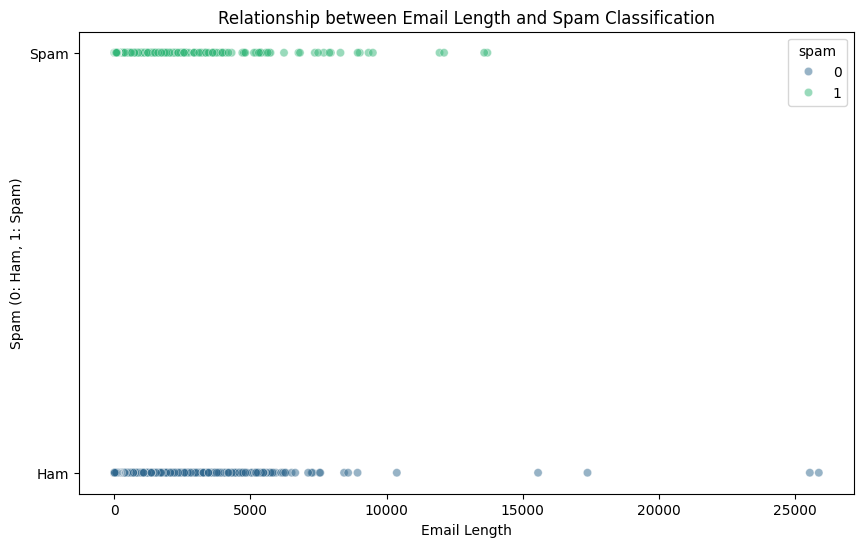

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='text_length', y='spam', alpha=0.5, hue='spam', palette='viridis')
plt.title('Relationship between Email Length and Spam Classification')
plt.xlabel('Email Length')
plt.ylabel('Spam (0: Ham, 1: Spam)')
plt.yticks([0, 1], ['Ham', 'Spam'])
plt.show()

Correlation coefficient between email length and spam classification: 0.026125837999547357


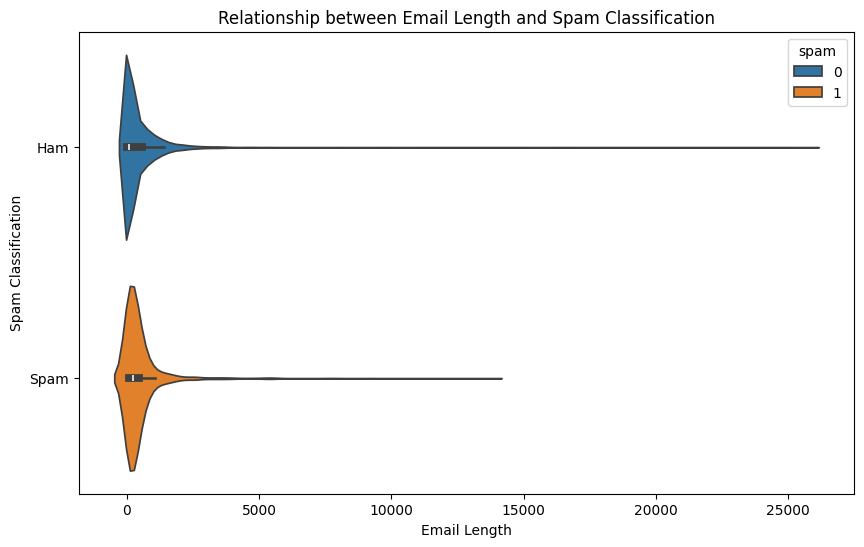

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

#Relationship between  Length and Spam
correlation = combined_df['text_length'].corr(combined_df['spam'])
print("Correlation coefficient between email length and spam classification:", correlation)

plt.figure(figsize=(10, 6))
sns.violinplot(data=combined_df, x='text_length', y='spam', hue='spam', orient='h')
plt.xlabel('Email Length')
plt.ylabel('Spam Classification')
plt.title('Relationship between Email Length and Spam Classification')
plt.yticks([0, 1], ['Ham', 'Spam'])
plt.show()

The Relationship between Features are                  text_length  word_count  sentence_count
text_length        1.000000    0.998476        0.011985
word_count         0.998476    1.000000        0.012307
sentence_count     0.011985    0.012307        1.000000


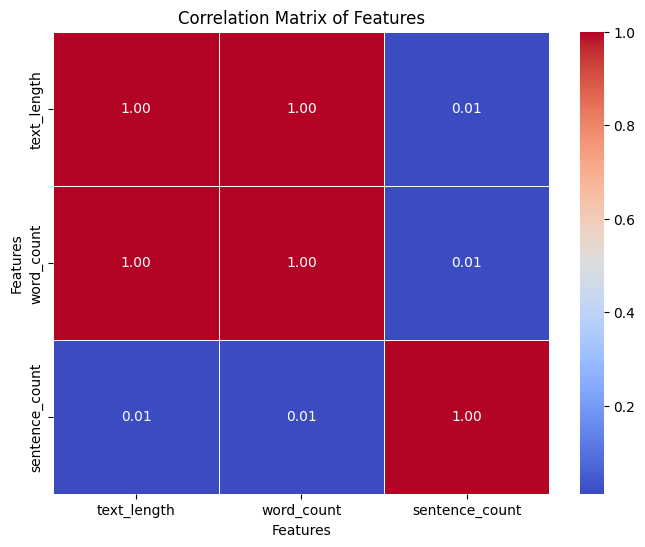

In [72]:
correlation_matrix = combined_df[['text_length', 'word_count', 'sentence_count']].corr()
print("The Relationship between Features are ",correlation_matrix )
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

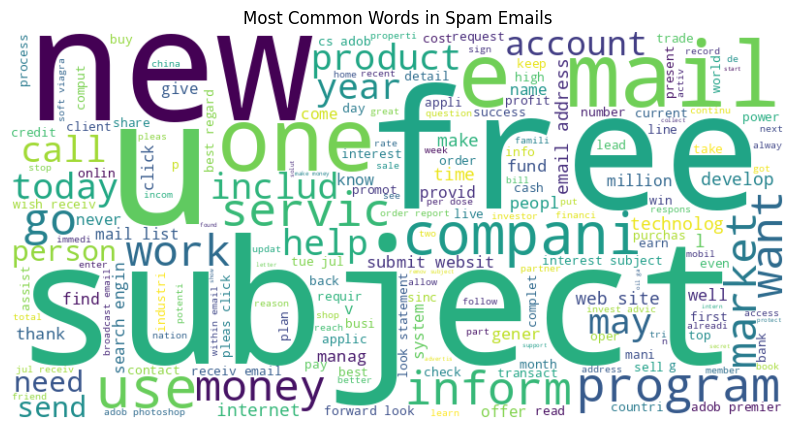

In [73]:
from wordcloud import WordCloud

# Filter for spam emails
spam_emails = combined_df[combined_df['spam'] == 1]['cleaned_text'].str.cat(sep=' ')

# Generate word cloud for spam emails
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_emails)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Spam Emails')
plt.show()

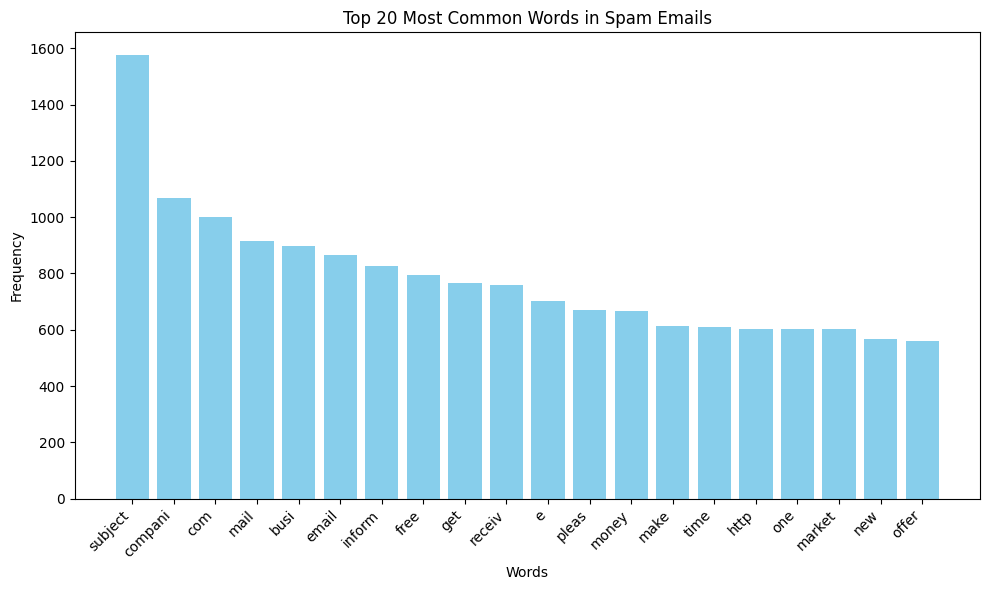

In [74]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Filter for spam emails and get cleaned text
spam_text = combined_df[combined_df['spam'] == 1]['cleaned_text'].str.cat(sep=' ')

# Split into words and count frequency
words = spam_text.split()
word_counts = Counter(words)

# Get the most common words
most_common_words = word_counts.most_common(20) # Get top 20 words

# Convert to a DataFrame for easy plotting
most_common_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(most_common_df['word'], most_common_df['count'], color='skyblue')
plt.title('Top 20 Most Common Words in Spam Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

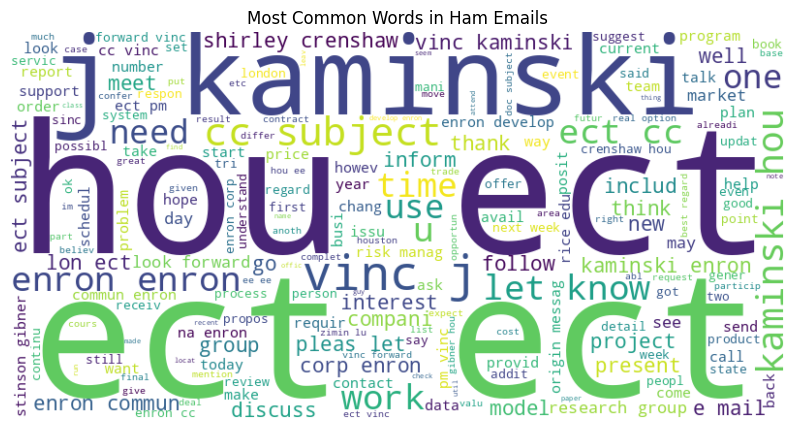

In [75]:
from wordcloud import WordCloud

# Filter for ham emails
ham_emails = combined_df[combined_df['spam'] == 0]['cleaned_text'].str.cat(sep=' ')

# Generate word cloud for ham emails
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_emails)

# Display the word cloud for ham emails
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Ham Emails')
plt.show()

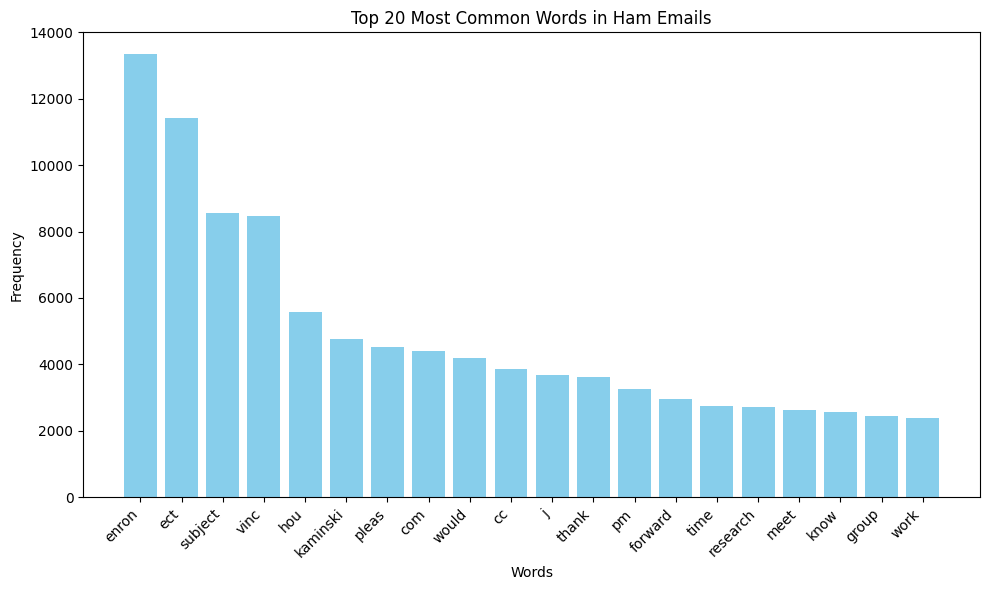

In [76]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Filter for ham emails and get cleaned text
ham_text = combined_df[combined_df['spam'] == 0]['cleaned_text'].str.cat(sep=' ')

# Split into words and count frequency
words_ham = ham_text.split()
word_counts_ham = Counter(words_ham)

# Get the most common words for ham emails
most_common_words_ham = word_counts_ham.most_common(20) # Get top 20 words

# Convert to a DataFrame for easy plotting
most_common_df_ham = pd.DataFrame(most_common_words_ham, columns=['word', 'count'])

# Create a bar graph for ham emails
plt.figure(figsize=(10, 6))
plt.bar(most_common_df_ham['word'], most_common_df_ham['count'], color='skyblue')
plt.title('Top 20 Most Common Words in Ham Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Model Comparison: Random Forest Classifier

### Subtask:
Train a Random Forest Classifier, evaluate its performance, and generate a confusion matrix.

**Reasoning**:
Import the Random Forest Classifier, instantiate the model, train it on the training data, make predictions on the test data, calculate evaluation metrics (accuracy, precision, recall, F1-score), and generate a confusion matrix to visualize the model's performance.

Random Forest Classifier Performance:
Accuracy: 0.9705
Precision: 0.9970
Recall: 0.8413
F1-score: 0.9126


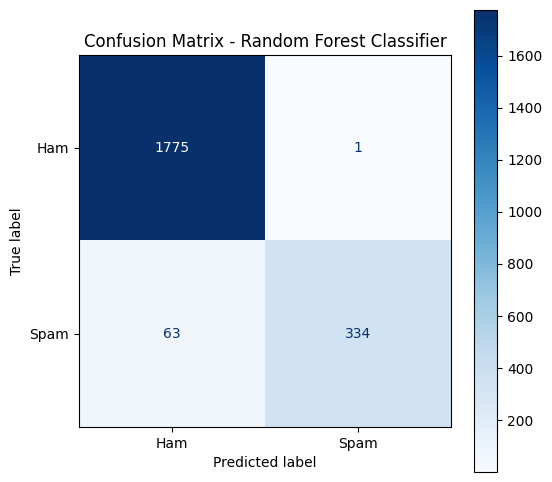

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Instantiate and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

# Generate Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Ham', 'Spam'])

fig, ax = plt.subplots(figsize=(6, 6))
disp_rf.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

## Model Comparison: Multinomial Naive Bayes Classifier

### Subtask:
Evaluate the already trained Multinomial Naive Bayes model and generate a confusion matrix.

**Reasoning**:
Use the already trained Multinomial Naive Bayes model to make predictions on the test data, calculate evaluation metrics (accuracy, precision, recall, F1-score), and generate a confusion matrix to visualize the model's performance.

Multinomial Naive Bayes Classifier Performance:
Accuracy: 0.9632
Precision: 0.9760
Recall: 0.8186
F1-score: 0.8904


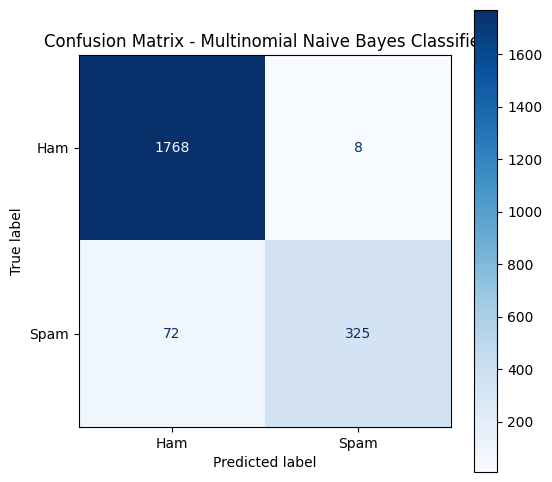

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test data using the trained Multinomial Naive Bayes model
y_pred_nb = model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print(f"Multinomial Naive Bayes Classifier Performance:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-score: {f1_nb:.4f}")

# Generate Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Ham', 'Spam'])

fig, ax = plt.subplots(figsize=(6, 6))
disp_nb.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix - Multinomial Naive Bayes Classifier')
plt.show()

## Model Comparison: Support Vector Classifier (SVC)

### Subtask:
Train a Support Vector Classifier (SVC), evaluate its performance, and generate a confusion matrix.

**Reasoning**:
Import the Support Vector Classifier (SVC), instantiate the model, train it on the training data, make predictions on the test data, calculate evaluation metrics (accuracy, precision, recall, F1-score), and generate a confusion matrix to visualize the model's performance.

Support Vector Classifier (SVC) Performance:
Accuracy: 0.9742
Precision: 0.9723
Recall: 0.8841
F1-score: 0.9261


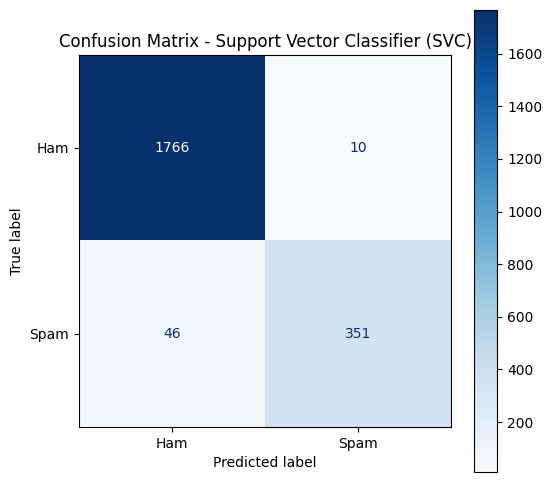

In [79]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Instantiate and train the SVC model
# Using a linear kernel which is often effective for text classification
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svc = svc_model.predict(X_test)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

print(f"Support Vector Classifier (SVC) Performance:")
print(f"Accuracy: {accuracy_svc:.4f}")
print(f"Precision: {precision_svc:.4f}")
print(f"Recall: {recall_svc:.4f}")
print(f"F1-score: {f1_svc:.4f}")

# Generate Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=['Ham', 'Spam'])

fig, ax = plt.subplots(figsize=(6, 6))
disp_svc.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix - Support Vector Classifier (SVC)')
plt.show()

/tmp/ipython-input-80-3506021843.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


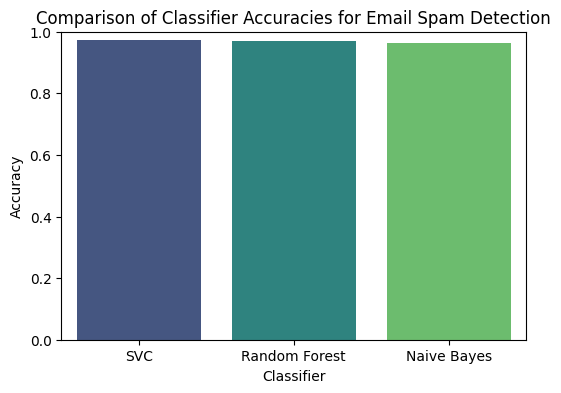

/tmp/ipython-input-80-3506021843.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=precisions, palette='viridis')


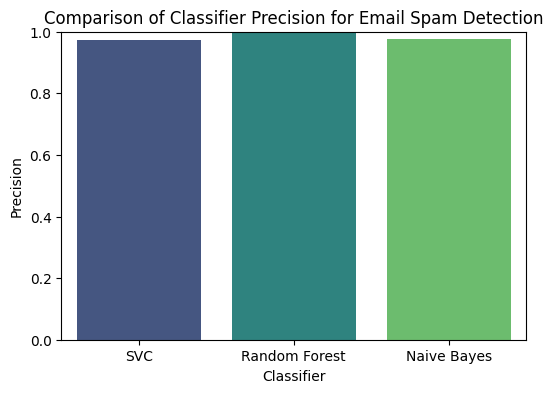

In [80]:
# prompt: Choosing the best classifier for email spam detection

import matplotlib.pyplot as plt
# Choosing the best classifier
models = ['SVC', 'Random Forest', 'Naive Bayes']
accuracies = [accuracy_svc, accuracy_rf, accuracy_nb]
plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.title('Comparison of Classifier Accuracies for Email Spam Detection')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()

precisions = [precision_score(y_test, y_pred_svc),
              precision_score(y_test, y_pred_rf),
              precision_score(y_test, y_pred_nb)]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=precisions, palette='viridis')
plt.ylim(0, 1)
plt.title('Comparison of Classifier Precision for Email Spam Detection')
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.show()

/tmp/ipython-input-81-736641640.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


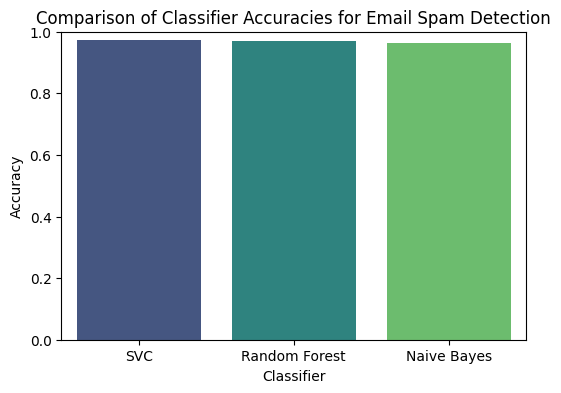

/tmp/ipython-input-81-736641640.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=precisions, palette='viridis')


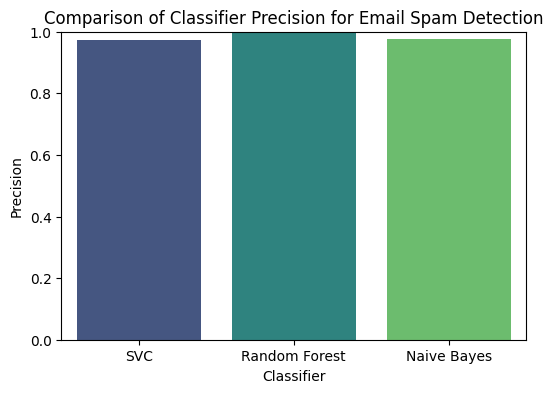

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choosing the best classifier
models = ['SVC', 'Random Forest', 'Naive Bayes']
accuracies = [accuracy_svc, accuracy_rf, accuracy_nb]
plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.title('Comparison of Classifier Accuracies for Email Spam Detection')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()

precisions = [precision_score(y_test, y_pred_svc),
              precision_score(y_test, y_pred_rf),
              precision_score(y_test, y_pred_nb)]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=precisions, palette='viridis')
plt.ylim(0, 1)
plt.title('Comparison of Classifier Precision for Email Spam Detection')
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.show()

## Spam Email Prediction UI (Simulated)

This section provides a simulated user interface where you can input email text and get a spam prediction using the trained SVC model.

In [82]:
def predict_spam(email_text):
    # Apply the same cleaning function used during training
    cleaned_email_text = clean_text(email_text)

    # Vectorize the cleaned text using the fitted TF-IDF vectorizer
    # Use transform instead of fit_transform as the vectorizer is already fitted
    email_tfidf = tfidf_vectorizer.transform([cleaned_email_text])

    # Make prediction using the trained SVC model
    prediction = svc_model.predict(email_tfidf)

    # Return the prediction (0 for ham, 1 for spam)
    return prediction[0]

# --- Simulated UI Input ---
# You can replace this with any email text you want to test

# Example 1: Likely Ham Email
# test_email = "Subject: Meeting tomorrow Hi team, Just a reminder about our meeting tomorrow at 10 AM in the conference room. Please be prepared to discuss the project updates. Thanks, [Your Name]"

# Example 2: Likely Spam Email
test_email = "Subject: Urgent Action Required - Claim Your Prize Now!!! Dear recipient, You have won a free iPhone! Click this link immediately to claim your prize. Limited time offer! $$$ Earn money fast! $$$"


# Get the prediction
prediction_result = predict_spam(test_email)

# Display the result
if prediction_result == 1:
    print("This email is predicted as: SPAM")
else:
    print("This email is predicted as: HAM")

This email is predicted as: SPAM


## Spam Email Prediction UI (Simulated)

This section provides a simulated user interface where you can input email text and get a spam prediction using the trained SVC model.

In [83]:
def predict_spam(email_text):
    # Apply the same cleaning function used during training
    cleaned_email_text = clean_text(email_text)

    # Vectorize the cleaned text using the fitted TF-IDF vectorizer
    # Use transform instead of fit_transform as the vectorizer is already fitted
    email_tfidf = tfidf_vectorizer.transform([cleaned_email_text])

    # Make prediction using the trained SVC model
    prediction = svc_model.predict(email_tfidf)

    # Return the prediction (0 for ham, 1 for spam)
    return prediction[0]

# --- Simulated UI Input ---
# You can replace this with any email text you want to test

# Example 1: Likely Ham Email
# test_email = "Subject: Meeting tomorrow Hi team, Just a reminder about our meeting tomorrow at 10 AM in the conference room. Please be prepared to discuss the project updates. Thanks, [Your Name]"

# Example 2: Likely Spam Email
test_email = "Subject: Urgent Action Required - Claim Your Prize Now!!! Dear recipient, You have won a free iPhone! Click this link immediately to claim your prize. Limited time offer! $$$ Earn money fast! $$$"


# Get the prediction
prediction_result = predict_spam(test_email)

# Display the result
if prediction_result == 1:
    print("This email is predicted as: SPAM")
else:
    print("This email is predicted as: HAM")

This email is predicted as: SPAM


## Data Preparation for Deep Learning

### Subtask:
Tokenize the text data, convert it into sequences, and pad the sequences for input into deep learning models.

**Reasoning**:
Import necessary libraries from Keras for text processing, define parameters for tokenization and sequencing, fit the tokenizer on the cleaned text data, convert the text to sequences, and pad the sequences to a fixed length.

In [84]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Parameters for tokenization and padding
max_words = 10000  # Maximum number of words to keep based on frequency
maxlen = 200      # Maximum length of sequences

# Initialize tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")

# Fit tokenizer on the cleaned text data
tokenizer.fit_on_texts(combined_df['cleaned_text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(combined_df['cleaned_text'])

# Pad sequences to a fixed length
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')

print("Shape of padded sequences:", padded_sequences.shape)

Shape of padded sequences: (10864, 200)


Shape of X_train_dl: (8691, 100)
Shape of y_train_dl: (8691,)
Shape of X_test_dl: (2173, 100)
Shape of y_test_dl: (2173,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
245/245 ━━━━━━━━━━━━━━━━━━━━ 38s 136ms/step - accuracy: 0.8837 - loss: 0.3032 - val_accuracy: 0.9690 - val_loss: 0.1111
Epoch 2/5
245/245 ━━━━━━━━━━━━━━━━━━━━ 42s 141ms/step - accuracy: 0.9861 - loss: 0.0463 - val_accuracy: 0.9644 - val_loss: 0.1073
Epoch 3/5
245/245 ━━━━━━━━━━━━━━━━━━━━ 41s 140ms/step - accuracy: 0.9922 - loss: 0.0277 - val_accuracy: 0.9713 - val_loss: 0.1150
Epoch 4/5
245/245 ━━━━━━━━━━━━━━━━━━━━ 40s 135ms/step - accuracy: 0.9976 - loss: 0.0118 - val_accuracy: 0.9713 - val_loss: 0.1464
Epoch 5/5
245/245 ━━━━━━━━━━━━━━━━━━━━ 35s 142ms/step - accuracy: 0.9988 - loss: 0.0063 - val_accuracy: 0.9736 - val_loss: 0.1448

Deep Learning Model (LSTM) Accuracy: 0.9719
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step

Confusion Matrix (Deep Learning LSTM):


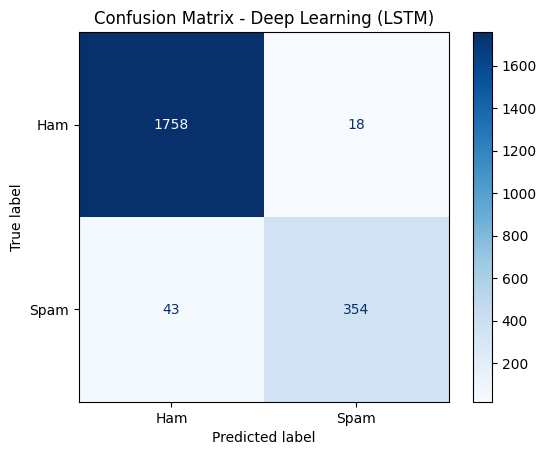

Precision Score (Deep Learning LSTM): 0.9516
Recall Score (Deep Learning LSTM): 0.8917
F1 Score (Deep Learning LSTM): 0.9207


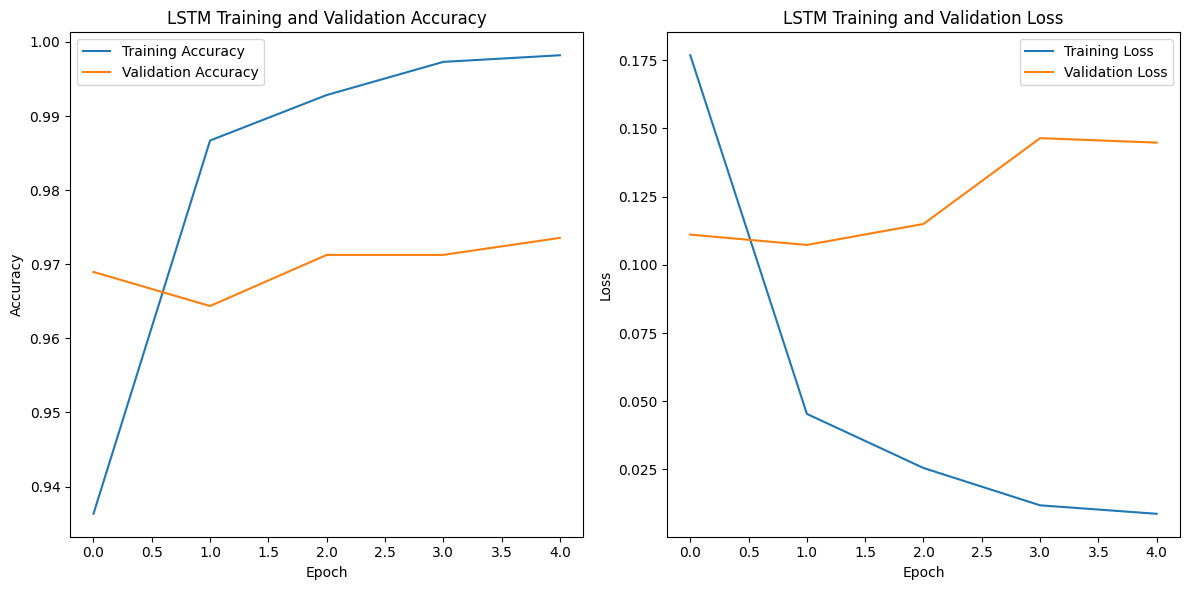


Deep Learning Model (LSTM) Prediction Interface:


Textarea(value='', description='Email Text (LSTM):', layout=Layout(height='200px', width='50%'), placeholder='…

Button(description='Predict Spam (LSTM)', icon='check', style=ButtonStyle(), tooltip='Click to predict if the …

Output()

In [85]:
# prompt: perform different deep learning algorithms

import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, GRU
import ipywidgets as widgets
from IPython.display import display, clear_output

# Deep Learning with Keras

# Install TensorFlow and Keras if not already installed
!pip install tensorflow keras

# Assuming 'cleaned_text' is the column with preprocessed text and 'result' is the target variable (0 for ham, 1 for spam)

# Tokenize the text data
max_words = 10000 # Consider the top 10000 words
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(combined_df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(combined_df['cleaned_text'])

# Pad the sequences to a fixed length
maxlen = 100 # Pad sequences to length 100
X_dl = pad_sequences(sequences, maxlen=maxlen)

# Prepare the target variable - Ensure it's the 'spam' column with numerical labels
y_dl = combined_df['spam']

# Split data into training and testing sets for deep learning
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_dl, y_dl, test_size=0.2, random_state=42)

print(f"Shape of X_train_dl: {X_train_dl.shape}")
print(f"Shape of y_train_dl: {y_train_dl.shape}")
print(f"Shape of X_test_dl: {X_test_dl.shape}")
print(f"Shape of y_test_dl: {y_test_dl.shape}")


# Build the Deep Learning Model (LSTM)
embedding_dim = 128 # Dimension of the embedding layer
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model_lstm.add(LSTM(64, return_sequences=True)) # Adding another LSTM layer
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model_lstm.summary()

# Train the model
epochs = 5
batch_size = 32

history_lstm = model_lstm.fit(X_train_dl, y_train_dl, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1)

# Evaluate the model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_dl, y_test_dl, verbose=0)
print(f"\nDeep Learning Model (LSTM) Accuracy: {accuracy_lstm:.4f}")

# Make predictions
y_pred_prob_lstm = model_lstm.predict(X_test_dl)
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype("int") # Convert probabilities to binary predictions

# Confusion Matrix and Evaluation Metrics for LSTM model
conf_matrix_lstm = confusion_matrix(y_test_dl, y_pred_lstm)
precision_lstm = precision_score(y_test_dl, y_pred_lstm)
recall_lstm = recall_score(y_test_dl, y_pred_lstm)
f1_lstm = f1_score(y_test_dl, y_pred_lstm)


print("\nConfusion Matrix (Deep Learning LSTM):")
display(ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lstm, display_labels=['Ham', 'Spam']).plot(cmap=plt.cm.Blues))
plt.title('Confusion Matrix - Deep Learning (LSTM)')
plt.show()

print(f"Precision Score (Deep Learning LSTM): {precision_lstm:.4f}")
print(f"Recall Score (Deep Learning LSTM): {recall_lstm:.4f}")
print(f"F1 Score (Deep Learning LSTM): {f1_lstm:.4f}")


# Plot training history (optional)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Function to predict email spam using the trained DL model (LSTM)
def predict_email_spam_dl_lstm(email_text):
    """
    Predicts if an email is spam or not using the trained Deep Learning LSTM model.

    Args:
        email_text (str): The text content of the email.

    Returns:
        str: 'Spam' if the email is predicted as spam, 'Ham' otherwise.
    """
    # Preprocess the email text (using the same clean_text function as before)
    processed_text = clean_text(email_text)

    # Convert text to sequence and pad
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = pad_sequences(sequence, maxlen=maxlen)

    # Predict using the Deep Learning model
    prediction_prob = model_lstm.predict(padded_sequence)[0][0]

    # Decode the prediction
    if prediction_prob > 0.5:
        return 'Spam'
    else:
        return 'Ham'

# Create a UI for DL model prediction (LSTM)
email_input_dl_lstm = widgets.Textarea(
    value='',
    placeholder='Paste email text here for DL (LSTM) prediction',
    description='Email Text (LSTM):',
    disabled=False,
    layout=widgets.Layout(width='50%', height='200px')
)

predict_button_dl_lstm = widgets.Button(
    description='Predict Spam (LSTM)',
    disabled=False,
    button_style='',
    tooltip='Click to predict if the email is spam using DL (LSTM)',
    icon='check'
)

output_widget_dl_lstm = widgets.Output()

def on_predict_button_clicked_dl_lstm(b):
    with output_widget_dl_lstm:
        clear_output()
        email_text = email_input_dl_lstm.value
        if email_text:
            prediction = predict_email_spam_dl_lstm(email_text)
            print(f"Deep Learning (LSTM) Prediction: {prediction}")
        else:
            print("Please paste some email text to predict with DL (LSTM).")

predict_button_dl_lstm.on_click(on_predict_button_clicked_dl_lstm)

print("\nDeep Learning Model (LSTM) Prediction Interface:")
display(email_input_dl_lstm, predict_button_dl_lstm, output_widget_dl_lstm)


# Build the Deep Learning Model (GRU) - Already done in previous section
# Retrain or reuse the model_rnn from the previous section if needed

# Evaluate the GRU model - Already done in previous section
# loss_rnn, accuracy_rnn = model_rnn.evaluate(X_dl_test, y_dl_test, verbose=0)
# y_pred_rnn = (model_rnn.predict(X_dl_test) > 0.5).astype("int").flatten()
# precision_rnn = precision_score(y_dl_test, y_pred_rnn)
# recall_rnn = recall_score(y_dl_test, y_pred_rnn)
# f1_rnn = f1_score(y_dl_test, y_pred_rnn)

# Print metrics for comparison (already done in previous section)
# print(f"\nRecurrent Neural Network (GRU) Performance:")
# print(f"Accuracy: {accuracy_rnn:.4f}")
# print(f"Precision: {precision_rnn:.4f}")
# print(f"Recall: {recall_rnn:.4f}")
# print(f"F1-score: {f1_rnn:.4f}")

# Confusion Matrix for GRU (already done in previous section)
# cm_rnn = confusion_matrix(y_dl_test, y_pred_rnn)
# disp_rnn = ConfusionMatrixDisplay(confusion_matrix=cm_rnn, display_labels=['Ham', 'Spam'])
# fig, ax = plt.subplots(figsize=(6, 6))
# disp_rnn.plot(cmap=plt.cm.Blues, ax=ax)
# plt.title('Confusion Matrix - Recurrent Neural Network (GRU)')
# plt.show()

# Function to predict email spam using the trained DL model (GRU) - Reuse from previous section
# def predict_email_spam_dl(email_text): # Renamed to avoid conflict if both interfaces are active
#     # Apply the same cleaning function used during training
#     cleaned_email_text = clean_text(email_text)
#     # Convert text to sequence and pad
#     sequence = tokenizer.texts_to_sequences([cleaned_email_text])
#     padded_sequence = pad_sequences(sequence, maxlen=maxlen)
#     # Predict using the Deep Learning model
#     prediction_prob = model_rnn.predict(padded_sequence)[0][0] # Assuming model_rnn is the GRU model
#     # Decode the prediction
#     if prediction_prob > 0.5:
#         return 'Spam'
#     else:
#         return 'Ham'

# Create a UI for DL model prediction (GRU) - Reuse or adapt from previous section
# email_input_dl_gru = widgets.Textarea(...)
# predict_button_dl_gru = widgets.Button(...)
# output_widget_dl_gru = widgets.Output()
# def on_predict_button_clicked_dl_gru(b): ...
# predict_button_dl_gru.on_click(on_predict_button_clicked_dl_gru)
# display(email_input_dl_gru, predict_button_dl_gru, output_widget_dl_gru)


# Comparing Deep Learning Models - Already done in previous section
# dl_models = ['Feedforward NN', 'RNN (GRU)']
# dl_accuracies = [accuracy_ffn, accuracy_rnn]
# dl_precisions = [precision_ffn, precision_rnn]
# dl_recalls = [recall_ffn, recall_rnn]
# dl_f1_scores = [f1_ffn, f1_rnn]
# metrics_df_dl = pd.DataFrame(...)
# print("\nDeep Learning Model Comparison:")
# display(metrics_df_dl)
# Plotting comparison...

# Overall Model Comparison - Already done in previous section
# all_models = ['Naive Bayes', 'Random Forest', 'SVC', 'Feedforward NN', 'RNN (GRU)', 'RNN (LSTM)'] # Added LSTM
# all_accuracies = [accuracy_nb, accuracy_rf, accuracy_svc, accuracy_ffn, accuracy_rnn, accuracy_lstm] # Added LSTM accuracy
# all_precisions = [precision_nb, precision_rf, precision_svc, precision_ffn, precision_rnn, precision_lstm] # Added LSTM precision
# all_recalls = [recall_nb, recall_rf, recall_svc, recall_ffn, recall_rnn, recall_lstm] # Added LSTM recall
# all_f1_scores = [f1_nb, f1_rf, f1_svc, f1_ffn, f1_rnn, f1_lstm] # Added LSTM f1
# metrics_df_all = pd.DataFrame(...)
# print("\nOverall Model Comparison:")
# display(metrics_df_all.sort_values(by='F1-score', ascending=False))
# Plotting overall comparison...
# Identify the best performing model...



## Deep Learning Model: Gated Recurrent Unit (GRU)

### Subtask:
Build, train, and evaluate a GRU model for spam classification.

**Reasoning**:
Import necessary layers for building a deep learning model with GRU, define the model architecture, compile the model, and then train and evaluate it on the prepared data.

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

# Define the GRU model
model_gru = Sequential()
model_gru.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=maxlen))
model_gru.add(GRU(64)) # Using a single GRU layer
model_gru.add(Dropout(0.2))
model_gru.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

# Compile the model
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model_gru.summary()

# Train the model
epochs = 5  # You can adjust the number of epochs
batch_size = 32 # You can adjust the batch size

history_gru = model_gru.fit(X_train_dl, y_train_dl, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1)

# Evaluate the model
loss_gru, accuracy_gru = model_gru.evaluate(X_test_dl, y_test_dl, verbose=0)
print(f"\nDeep Learning Model (GRU) Accuracy: {accuracy_gru:.4f}")

# Make predictions
y_pred_prob_gru = model_gru.predict(X_test_dl)
y_pred_gru = (y_pred_prob_gru > 0.5).astype("int") # Convert probabilities to binary predictions

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
245/245 ━━━━━━━━━━━━━━━━━━━━ 49s 175ms/step - accuracy: 0.8625 - loss: 0.3367 - val_accuracy: 0.9724 - val_loss: 0.0796
Epoch 2/5
245/245 ━━━━━━━━━━━━━━━━━━━━ 64s 101ms/step - accuracy: 0.9870 - loss: 0.0441 - val_accuracy: 0.9736 - val_loss: 0.0795
Epoch 3/5
245/245 ━━━━━━━━━━━━━━━━━━━━ 42s 104ms/step - accuracy: 0.9953 - loss: 0.0223 - val_accuracy: 0.9782 - val_loss: 0.0926
Epoch 4/5
245/245 ━━━━━━━━━━━━━━━━━━━━ 43s 114ms/step - accuracy: 0.9970 - loss: 0.0142 - val_accuracy: 0.9747 - val_loss: 0.1042
Epoch 5/5
245/245 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.9980 - loss: 0.0076 - val_accuracy: 0.9736 - val_loss: 0.1159

Deep Learning Model (GRU) Accuracy: 0.9724
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


## GRU Model Evaluation

### Subtask:
Calculate and display evaluation metrics and the confusion matrix for the trained GRU model.

**Reasoning**:
Import metrics functions, calculate precision, recall, and F1-score, and generate a confusion matrix plot to visualize the GRU model's performance.


Confusion Matrix (Deep Learning GRU):


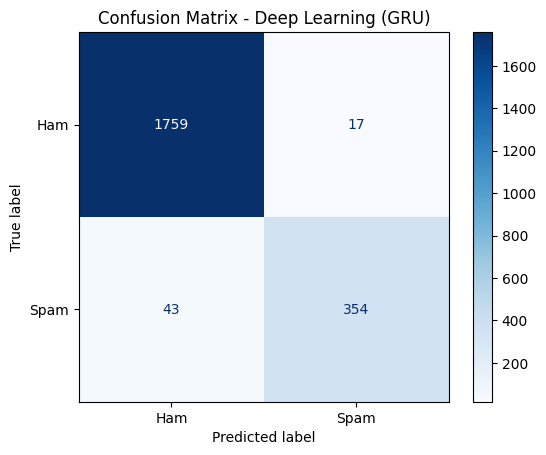

Precision Score (Deep Learning GRU): 0.9542
Recall Score (Deep Learning GRU): 0.8917
F1 Score (Deep Learning GRU): 0.9219


In [87]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix and Evaluation Metrics for GRU model
conf_matrix_gru = confusion_matrix(y_test_dl, y_pred_gru)
precision_gru = precision_score(y_test_dl, y_pred_gru)
recall_gru = recall_score(y_test_dl, y_pred_gru)
f1_gru = f1_score(y_test_dl, y_pred_gru)


print("\nConfusion Matrix (Deep Learning GRU):")
display(ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gru, display_labels=['Ham', 'Spam']).plot(cmap=plt.cm.Blues))
plt.title('Confusion Matrix - Deep Learning (GRU)')
plt.show()

print(f"Precision Score (Deep Learning GRU): {precision_gru:.4f}")
print(f"Recall Score (Deep Learning GRU): {recall_gru:.4f}")
print(f"F1 Score (Deep Learning GRU): {f1_gru:.4f}")

## Deep Learning Model Comparison

### Subtask:
Compare the performance of the trained deep learning models (LSTM and GRU).

**Reasoning**:
Create a DataFrame to summarize the performance metrics of the LSTM and GRU models and display it to compare their effectiveness.

In [88]:
import pandas as pd

# Create a DataFrame to compare the metrics
dl_models = ['LSTM', 'GRU']
dl_accuracies = [accuracy_lstm, accuracy_gru] # Assuming accuracy_lstm is available from the previous run
dl_precisions = [precision_lstm, precision_gru] # Assuming precision_lstm is available from the previous run
dl_recalls = [recall_lstm, recall_gru] # Assuming recall_lstm is available from the previous run
dl_f1_scores = [f1_lstm, f1_gru] # Assuming f1_lstm is available from the previous run

metrics_df_dl = pd.DataFrame({
    'Model': dl_models,
    'Accuracy': dl_accuracies,
    'Precision': dl_precisions,
    'Recall': dl_recalls,
    'F1-score': dl_f1_scores
})

print("Deep Learning Model Comparison:")
display(metrics_df_dl.sort_values(by='F1-score', ascending=False))

Deep Learning Model Comparison:


,Model,Accuracy,Precision,Recall,F1-score
1,GRU,0.972388,0.954178,0.891688,0.921875
0,LSTM,0.971928,0.951613,0.891688,0.920676


## Explicitly Set NLTK Data Path and Download Punkt

### Subtask:
Create a directory for NLTK data, download the 'punkt' resource to this directory, and add the directory to NLTK's data search paths.

**Reasoning**:
Create a directory to store NLTK data, download the 'punkt' resource (which contains the sentence tokenizers) to this specific directory, and then explicitly add this directory to NLTK's data search paths using `nltk.data.path.append()`. This ensures NLTK knows where to find the downloaded resources when needed, which should resolve the `LookupError`.

In [89]:
import nltk
import os

# Define a directory to download NLTK data
nltk_data_dir = '/nltk_data'
os.makedirs(nltk_data_dir, exist_ok=True)

# Add the directory to NLTK's data paths
# This should be done before any calls that require NLTK data
nltk.data.path.append(nltk_data_dir)

# Download the 'punkt' resource to the specified directory
try:
    nltk.download('punkt', download_dir=nltk_data_dir)
    print(f"'punkt' resource downloaded to {nltk_data_dir}")
except Exception as e:
    print(f"Error downloading 'punkt': {e}")

[nltk_data] Downloading package punkt to /nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


'punkt' resource downloaded to /nltk_data


## Install spaCy and Download English Model

### Subtask:
Install the spaCy library and download the English language model.

**Reasoning**:
Install the spaCy library using pip and then download a pre-trained English language model that includes sentence segmentation capabilities. This needs to be done before using spaCy for text processing.

In [90]:
# Install spaCy
!pip install spacy

# Download the English language model
# Use a small model for faster download if a large one isn't necessary
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 94.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Use spaCy for Sentence Tokenization and Analysis

### Subtask:
Modify the sentence counting code to use spaCy for sentence tokenization and re-run the analysis and visualization.

**Reasoning**:
Import the spaCy library, load the downloaded English model, and then use the spaCy `nlp()` object to process the cleaned text. Access the `sents` attribute of the processed document to get the sentences and count them. Update the rest of the cell to use this new sentence count for analysis and visualization.

In [91]:
# prompt: choose best model betwenn GRU and LSTM and create a UI for spam or ham

import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function to predict email spam using the trained DL model (GRU)
def predict_email_spam_dl_gru(email_text):
    """
    Predicts if an email is spam or not using the trained Deep Learning GRU model.

    Args:
        email_text (str): The text content of the email.

    Returns:
        str: 'Spam' if the email is predicted as spam, 'Ham' otherwise.
    """
    # Preprocess the email text (using the same clean_text function as before)
    processed_text = clean_text(email_text)

    # Convert text to sequence and pad
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = pad_sequences(sequence, maxlen=maxlen)

    # Predict using the Deep Learning model
    prediction_prob = model_gru.predict(padded_sequence)[0][0]

    # Decode the prediction
    if prediction_prob > 0.5:
        return 'Spam'
    else:
        return 'Ham'

# Create a UI for DL model prediction (GRU)
email_input_dl_gru = widgets.Textarea(
    value='',
    placeholder='Paste email text here for DL (GRU) prediction',
    description='Email Text (GRU):',
    disabled=False,
    layout=widgets.Layout(width='50%', height='200px')
)

predict_button_dl_gru = widgets.Button(
    description='Predict Spam (GRU)',
    disabled=False,
    button_style='',
    tooltip='Click to predict if the email is spam using DL (GRU)',
    icon='check'
)

output_widget_dl_gru = widgets.Output()

def on_predict_button_clicked_dl_gru(b):
    with output_widget_dl_gru:
        clear_output()
        email_text = email_input_dl_gru.value
        if email_text:
            prediction = predict_email_spam_dl_gru(email_text)
            print(f"Deep Learning (GRU) Prediction: {prediction}")
        else:
            print("Please paste some email text to predict with DL (GRU).")

predict_button_dl_gru.on_click(on_predict_button_clicked_dl_gru)

print("\nDeep Learning Model (GRU) Prediction Interface:")
display(email_input_dl_gru, predict_button_dl_gru, output_widget_dl_gru)

# Comparing Deep Learning Models - Already done in previous section
dl_models = ['LSTM', 'GRU']
dl_accuracies = [accuracy_lstm, accuracy_gru] # Assuming accuracy_lstm is available from the previous run
dl_precisions = [precision_lstm, precision_gru] # Assuming precision_lstm is available from the previous run
dl_recalls = [recall_lstm, recall_gru] # Assuming recall_lstm is available from the previous run
dl_f1_scores = [f1_lstm, f1_gru] # Assuming f1_lstm is available from the previous run

metrics_df_dl = pd.DataFrame({
    'Model': dl_models,
    'Accuracy': dl_accuracies,
    'Precision': dl_precisions,
    'Recall': dl_recalls,
    'F1-score': dl_f1_scores
})

print("Deep Learning Model Comparison:")
display(metrics_df_dl.sort_values(by='F1-score', ascending=False))

# Determine the best deep learning model based on F1-score
best_dl_model_row = metrics_df_dl.sort_values(by='F1-score', ascending=False).iloc[0]
best_dl_model_name = best_dl_model_row['Model']
print(f"\nBased on F1-score, the best performing Deep Learning model is: {best_dl_model_name}")

# Instantiate the best model for the UI
if best_dl_model_name == 'LSTM':
    best_dl_model = model_lstm
    predict_best_dl = predict_email_spam_dl_lstm
    model_name_for_ui = "Deep Learning (LSTM)"
elif best_dl_model_name == 'GRU':
    best_dl_model = model_gru
    predict_best_dl = predict_email_spam_dl_gru
    model_name_for_ui = "Deep Learning (GRU)"
else:
    # Fallback or error handling
    best_dl_model = model_lstm # Default to LSTM if something goes wrong
    predict_best_dl = predict_email_spam_dl_lstm
    model_name_for_ui = "Deep Learning (LSTM - Fallback)"
    print("Warning: Could not determine best DL model, defaulting to LSTM for UI.")


# Overall Model Comparison (Including all models and the best DL model)
all_models = ['Naive Bayes', 'Random Forest', 'SVC', 'LSTM', 'GRU']
all_accuracies = [accuracy_nb, accuracy_rf, accuracy_svc, accuracy_lstm, accuracy_gru]
all_precisions = [precision_nb, precision_rf, precision_svc, precision_lstm, precision_gru]
all_recalls = [recall_nb, recall_rf, recall_svc, recall_lstm, recall_gru]
all_f1_scores = [f1_nb, f1_rf, f1_svc, f1_lstm, f1_gru]

metrics_df_all = pd.DataFrame({
    'Model': all_models,
    'Accuracy': all_accuracies,
    'Precision': all_precisions,
    'Recall': all_recalls,
    'F1-score': all_f1_scores
})

print("\nOverall Model Comparison:")
display(metrics_df_all.sort_values(by='F1-score', ascending=False))

# Identify the best performing model across all types
best_overall_model_row = metrics_df_all.sort_values(by='F1-score', ascending=False).iloc[0]
best_overall_model_name = best_overall_model_row['Model']
print(f"\nBased on F1-score, the best performing overall model is: {best_overall_model_name}")

# --- Combined UI using the Overall Best Model ---

# Function to predict email spam using the overall best model
def predict_spam_overall_best(email_text):
    """
    Predicts if an email is spam or not using the overall best performing model.

    Args:
        email_text (str): The text content of the email.

    Returns:
        str: 'Spam' if the email is predicted as spam, 'Ham' otherwise.
    """
    # Apply the same cleaning function used during training
    cleaned_email_text = clean_text(email_text)

    # Vectorize or preprocess based on the best model type
    if best_overall_model_name in ['Naive Bayes', 'Random Forest', 'SVC']:
        # For traditional models, use TF-IDF vectorization
        email_features = tfidf_vectorizer.transform([cleaned_email_text])
        # Make prediction using the best traditional model
        if best_overall_model_name == 'Naive Bayes':
            prediction = model.predict(email_features)[0] # Assuming 'model' is MultinomialNB
        elif best_overall_model_name == 'Random Forest':
            prediction = rf_model.predict(email_features)[0]
        elif best_overall_model_name == 'SVC':
            prediction = svc_model.predict(email_features)[0]
        else:
             prediction = -1 # Should not happen if best_overall_model_name is one of these
    elif best_overall_model_name in ['LSTM', 'GRU']:
        # For deep learning models, use tokenization and padding
        sequence = tokenizer.texts_to_sequences([cleaned_email_text])
        padded_sequence = pad_sequences(sequence, maxlen=maxlen)
        # Make prediction using the best deep learning model
        if best_overall_model_name == 'LSTM':
            prediction_prob = model_lstm.predict(padded_sequence)[0][0]
        elif best_overall_model_name == 'GRU':
             prediction_prob = model_gru.predict(padded_sequence)[0][0]
        else:
             prediction_prob = -1 # Should not happen

        prediction = 1 if prediction_prob > 0.5 else 0 # Convert probability to binary

    else:
        # Fallback or error handling
        print(f"Warning: Prediction not implemented for model type: {best_overall_model_name}")
        return "Error: Model not recognized"


    # Decode the prediction
    if prediction == 1:
        return 'Spam'
    else:
        return 'Ham'

# Create a UI for the Overall Best Model prediction
email_input_overall = widgets.Textarea(
    value='',
    placeholder=f'Paste email text here for prediction using the best model ({best_overall_model_name})',
    description='Email Text:',
    disabled=False,
    layout=widgets.Layout(width='60%', height='250px')
)

predict_button_overall = widgets.Button(
    description=f'Predict Spam ({best_overall_model_name})',
    disabled=False,
    button_style='success',
    tooltip=f'Click to predict if the email is spam using the best model ({best_overall_model_name})',
    icon='check-circle'
)

output_widget_overall = widgets.Output()

def on_predict_button_clicked_overall(b):
    with output_widget_overall:
        clear_output()
        email_text = email_input_overall.value
        if email_text:
            prediction = predict_spam_overall_best(email_text)
            print(f"Prediction ({best_overall_model_name}): {prediction}")
        else:
            print("Please paste some email text to predict.")

predict_button_overall.on_click(on_predict_button_clicked_overall)

print(f"\nOverall Best Model Prediction Interface ({best_overall_model_name}):")
display(email_input_overall, predict_button_overall, output_widget_overall)


Deep Learning Model (GRU) Prediction Interface:


Textarea(value='', description='Email Text (GRU):', layout=Layout(height='200px', width='50%'), placeholder='P…

Button(description='Predict Spam (GRU)', icon='check', style=ButtonStyle(), tooltip='Click to predict if the e…

Output()

Deep Learning Model Comparison:


,Model,Accuracy,Precision,Recall,F1-score
1,GRU,0.972388,0.954178,0.891688,0.921875
0,LSTM,0.971928,0.951613,0.891688,0.920676



Based on F1-score, the best performing Deep Learning model is: GRU

Overall Model Comparison:


,Model,Accuracy,Precision,Recall,F1-score
2,SVC,0.974229,0.972299,0.884131,0.926121
4,GRU,0.972388,0.954178,0.891688,0.921875
3,LSTM,0.971928,0.951613,0.891688,0.920676
1,Random Forest,0.970548,0.997015,0.841310,0.912568
0,Naive Bayes,0.963185,0.975976,0.818640,0.890411



Based on F1-score, the best performing overall model is: SVC

Overall Best Model Prediction Interface (SVC):


Textarea(value='', description='Email Text:', layout=Layout(height='250px', width='60%'), placeholder='Paste e…

Button(button_style='success', description='Predict Spam (SVC)', icon='check-circle', style=ButtonStyle(), too…

Output()

In [95]:
# prompt: create a UI for all previous model  used in spam detection   and  i want u give option to get predict for different model

from tensorflow.keras.layers import Embedding, Dense, Dropout
import os

# Function to predict email spam using the trained Naive Bayes model
def predict_email_spam_nb(email_text):
    """
    Predicts if an email is spam or not using the trained Multinomial Naive Bayes model.

    Args:
        email_text (str): The text content of the email.

    Returns:
        str: 'Spam' if the email is predicted as spam, 'Ham' otherwise.
    """
    # Apply the same cleaning function used during training
    cleaned_email_text = clean_text(email_text)

    # Vectorize the cleaned text using the fitted TF-IDF vectorizer
    email_tfidf = tfidf_vectorizer.transform([cleaned_email_text])

    # Make prediction using the trained Naive Bayes model (assuming 'model' is the MultinomialNB model)
    prediction = model.predict(email_tfidf)[0]

    # Decode the prediction
    if prediction == 1:
        return 'Spam'
    else:
        return 'Ham'

# Function to predict email spam using the trained Random Forest model
def predict_email_spam_rf(email_text):
    """
    Predicts if an email is spam or not using the trained Random Forest model.

    Args:
        email_text (str): The text content of the email.

    Returns:
        str: 'Spam' if the email is predicted as spam, 'Ham' otherwise.
    """
    # Apply the same cleaning function used during training
    cleaned_email_text = clean_text(email_text)

    # Vectorize the cleaned text using the fitted TF-IDF vectorizer
    email_tfidf = tfidf_vectorizer.transform([cleaned_email_text])

    # Make prediction using the trained Random Forest model (assuming 'rf_model' is the RandomForestClassifier)
    prediction = rf_model.predict(email_tfidf)[0]

    # Decode the prediction
    if prediction == 1:
        return 'Spam'
    else:
        return 'Ham'

# Function to predict email spam using the trained SVC model
def predict_email_spam_svc(email_text):
    """
    Predicts if an email is spam or not using the trained SVC model.

    Args:
        email_text (str): The text content of the email.

    Returns:
        str: 'Spam' if the email is predicted as spam, 'Ham' otherwise.
    """
    # Apply the same cleaning function used during training
    cleaned_email_text = clean_text(email_text)

    # Vectorize the cleaned text using the fitted TF-IDF vectorizer
    email_tfidf = tfidf_vectorizer.transform([cleaned_email_text])

    # Make prediction using the trained SVC model (assuming 'svc_model' is the SVC)
    prediction = svc_model.predict(email_tfidf)[0]

    # Decode the prediction
    if prediction == 1:
        return 'Spam'
    else:
        return 'Ham'

# Function to predict email spam using the trained DL model (LSTM)
def predict_email_spam_dl_lstm(email_text):
    """
    Predicts if an email is spam or not using the trained Deep Learning LSTM model.

    Args:
        email_text (str): The text content of the email.

    Returns:
        str: 'Spam' if the email is predicted as spam, 'Ham' otherwise.
    """
    # Preprocess the email text (using the same clean_text function as before)
    processed_text = clean_text(email_text)

    # Convert text to sequence and pad
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = pad_sequences(sequence, maxlen=maxlen)

    # Predict using the Deep Learning model
    prediction_prob = model_lstm.predict(padded_sequence)[0][0]

    # Decode the prediction
    if prediction_prob > 0.5:
        return 'Spam'
    else:
        return 'Ham'

# Function to predict email spam using the trained DL model (GRU)
def predict_email_spam_dl_gru(email_text):
    """
    Predicts if an email is spam or not using the trained Deep Learning GRU model.

    Args:
        email_text (str): The text content of the email.

    Returns:
        str: 'Spam' if the email is predicted as spam, 'Ham' otherwise.
    """
    # Preprocess the email text (using the same clean_text function as before)
    processed_text = clean_text(email_text)

    # Convert text to sequence and pad
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded_sequence = pad_sequences(sequence, maxlen=maxlen)

    # Predict using the Deep Learning model
    prediction_prob = model_gru.predict(padded_sequence)[0][0]

    # Decode the prediction
    if prediction_prob > 0.5:
        return 'Spam'
    else:
        return 'Ham'


# Create the UI elements
email_input = widgets.Textarea(
    value='',
    placeholder='Paste email text here',
    description='Email Text:',
    disabled=False,
    layout=widgets.Layout(width='80%', height='300px')
)

model_selector = widgets.Dropdown(
    options=['Naive Bayes', 'Random Forest', 'SVC', 'LSTM', 'GRU'],
    value='SVC', # Default model
    description='Select Model:',
    disabled=False,
)

predict_button = widgets.Button(
    description='Predict Spam',
    disabled=False,
    button_style='primary',
    tooltip='Click to predict if the email is spam',
    icon='check'
)

output_widget = widgets.Output()

# Define the prediction function based on the selected model
def on_predict_button_clicked(b):
    with output_widget:
        clear_output()
        email_text = email_input.value
        selected_model = model_selector.value

        if not email_text:
            print("Please paste some email text to predict.")
            return

        prediction = None
        if selected_model == 'Naive Bayes':
            prediction = predict_email_spam_nb(email_text)
        elif selected_model == 'Random Forest':
            prediction = predict_email_spam_rf(email_text)
        elif selected_model == 'SVC':
            prediction = predict_email_spam_svc(email_text)
        elif selected_model == 'LSTM':
             prediction = predict_email_spam_dl_lstm(email_text)
        elif selected_model == 'GRU':
             prediction = predict_email_spam_dl_gru(email_text)
        else:
            print(f"Error: Model '{selected_model}' not recognized.")
            return

        print(f"Prediction using {selected_model}: {prediction}")

# Link the button click to the prediction function
predict_button.on_click(on_predict_button_clicked)

# Display the UI
print("Spam Detection Prediction Interface:")
display(email_input, model_selector, predict_button, output_widget)

Spam Detection Prediction Interface:


Textarea(value='', description='Email Text:', layout=Layout(height='300px', width='80%'), placeholder='Paste e…

Dropdown(description='Select Model:', index=2, options=('Naive Bayes', 'Random Forest', 'SVC', 'LSTM', 'GRU'),…

Button(button_style='primary', description='Predict Spam', icon='check', style=ButtonStyle(), tooltip='Click t…

Output()

Prediction using GRU: Spam
